# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import json
import tweepy
import time
%matplotlib inline

# wrd is the variable name for the dataframe containing the twitter-archive-enhanced.csv data
wrd = pd.read_csv('twitter-archive-enhanced.csv')
wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
filename = 'image_predictions.tsv'
twitter_file = 'tweet_json.txt'
if not os.path.join(os.getcwd(), filename):
    print('file does not exist')
    image_predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
    with open(filename, mode='wb') as file:
        file.write(image_predictions.content)
else:
    print("File already exists\nDownload skipped")

File already exists
Download skipped


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
api_key = os.getenv('API_Key')
api_key_secret = os.getenv('API_Key_Secret')
bearer_token = os.getenv('Bearer_Token')
access_token = os.getenv('Access_Token')
access_token_secret = os.getenv('Access_Token_Secret')
# print(access_token_secret)

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [4]:
sample_10 = wrd.sample(10)

def get_tweets(id):
    tweet_deets = ""
    try:
        tweet_deets = api.get_status(id, tweet_mode='extended')
    except tweepy.TweepError as tweep_error:
#         print(tweep_error)
#         print(type(tweep_error))
#         print(dir(tweep_error))
#         print(tweep_error.response)
#         print(tweep_error.api_code)
        if tweep_error.api_code == 88:
            time.sleep(960)
            return json.dumps(api.get_status(id, tweet_mode='extended')._json)
        return ""
    else:
        return json.dumps(tweet_deets._json)

if not os.path.join(os.getcwd(), twitter_file):
    with open(twitter_file, mode='w') as tweet_file:
        wrd['tweet_id'].apply(lambda id: tweet_file.write(get_tweets(id) + "\n"))
        
# else:
#     print('{} already exists'.format(twitter_file))

In [5]:
tweet_file_list = []
attrs_of_interest = ['id', 'retweet_count', 'favorite_count', 'retweeted', 'favorited']

with open(twitter_file, mode='r') as tweet_file:
#     print(tweet_file.readline())
    counter = 0
    for line in tweet_file:
        counter += 1
        temp_dict = {}
        if line != '\n':
            tweet_line = json.loads(line)
            if counter == 1:
                print(list(tweet_line))
#         print(tweet_line['retweeted'])
#         print("{}, ".format(counter))
            for attr in attrs_of_interest:
                if attr in tweet_line:
                    temp_dict[attr] = tweet_line[attr]
            tweet_file_list.append(temp_dict)
    print(counter)

['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang']
2356


In [6]:
wrd_plus = pd.DataFrame(tweet_file_list)
# wrd_plus.sample(10)
wrd_plus.info()
# wrd_plus[wrd_plus['place'] == None]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
favorite_count    2327 non-null int64
favorited         2327 non-null bool
id                2327 non-null int64
retweet_count     2327 non-null int64
retweeted         2327 non-null bool
dtypes: bool(2), int64(3)
memory usage: 59.2 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
# Display the twitter-archive-enhanced.csv dataframe: visual assessment
wrd
# wrd.source.value_counts()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
# Some columns have 'rating_denominator' not equal to 10.
wrd.rating_denominator.value_counts()
denom_10_plus = wrd.query('rating_denominator != 10')
# denom_10_plus.index
for i in denom_10_plus.index:
    print(denom_10_plus.retweeted_status_id[i])
    print(denom_10_plus.text[i])
    print(denom_10_plus.name[i])
    print(denom_10_plus.rating_numerator[i], " / ", denom_10_plus.rating_denominator[i], "\n")
    
# Some of the denominators

nan
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
None
960  /  0 

nan
@docmisterio account started on 11/15/15
None
11  /  15 

nan
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
None
84  /  70 

nan
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Sam
24  /  7 

7.40373189193e+17
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
None
9  /  11 

nan
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
None
165  /  150 

nan
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
None
9  /  11 

nan
Say hello to this unbelievably well behaved squad of doggos. 204/170

In [9]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Checking for duplicated data
wrd.duplicated(subset=wrd.columns[1:]).sum()

0

In [11]:
img_predictions = pd.read_csv('image_predictions.tsv', delimiter="\t")

# Visual assessment of image predictions file
img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
print(img_predictions.duplicated(subset='tweet_id').sum())
img_predictions.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
wrd_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 5 columns):
favorite_count    2327 non-null int64
favorited         2327 non-null bool
id                2327 non-null int64
retweet_count     2327 non-null int64
retweeted         2327 non-null bool
dtypes: bool(2), int64(3)
memory usage: 59.2 KB


In [14]:
wrd_plus.duplicated(subset='id').sum()

0

## Quality issues
#### **twitter-archive-enhanced.csv** -  
1. Some observations are retweets

2. Columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls' have missing data.

3. 'source' is an html anchor tag whose value is the actual source data

4. 'rating_denominator' has some values not equal to 10 (invalid data)

5. 'name' column contains some missing and incorrect dog names (missing and invalid data)

6. Some dogs do not have dog stage assigned (missing data)

#### **image predictions file**
7. Dog breed predictions are separated with an underscore instead of a space and some start with uppercase letters while others start lowercase letters.

#### **twitter api dataframe**
8. Some tweet ids are private or have been deleted (missing data)

### Tidiness issues
1. Column headers 'doggo', 'floofer', 'pupper', and 'puppo' are values for a 'dog_stage' variable but are represented as variables

2. One observational unit type represented in two tables: the 'twitter-archive-enhanced.csv' table and the data downloaded via Twitter api

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [15]:
# Make copies of original pieces of data
wrd_copy = wrd.copy()
img_predictions_copy = img_predictions.copy()
wrd_plus_copy = wrd_plus.copy()

### Issue #1:
Some observations are retweets

#### Define: 
Drop the observations containing retweets (identified by non-null 'retweeted_status_id' etc).

#### Code

In [16]:
# print(wrd_copy['expanded_urls'][0])
# Get retweets
retweets = wrd_copy[wrd_copy['retweeted_status_id'].notnull()].index

# Drop retweets
wrd_copy.drop(index=retweets, inplace=True)

#### Test

In [17]:
wrd_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2:
Columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls' have missing data.

#### Define: 
Drop the columns mentioned above because they do not have any use in my analysis as far as my understanding of this dataset and project requirements go.

#### Code

In [18]:
# Drop columns with missing data
wrd_copy.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], inplace=True)

#### Test

In [19]:
wrd_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue #3:
'source' is an html anchor tag whose value is the actual source data

#### Define
I will use regular expressions to extract the source variable from the anchor tag

#### Code

In [20]:
wrd_copy['sources'] = wrd_copy['source'].str.extract(r'(\>[A-Za-z -]+)')
wrd_copy['sources'] = wrd_copy['sources'].str[1:]
wrd_copy.drop(columns=['source'], inplace=True)
wrd_copy.rename(columns={'sources': 'source'}, inplace=True)
# wrd_copy.sample(10)

#### Test

In [21]:
print(wrd_copy.source.isnull().sum())
wrd_copy['source'].value_counts()

0


Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #4:
'rating_denominator' has some values not equal to 10 (invalid data)

#### Define
It is expected that the ratings denominator should be equal to 10 while the numerator is greater than 10. On closer examination, denominators greater than 10 are either errors or ratings for more than one dog at a time. However, they may be invalid for my purposes because the image predictions file may wrongly identify pictures with multiple dogs. I will fix the denominators not equal to 10 by dropping the selected rows since they are invalid data.

#### Code

In [22]:
wrong_denominators = wrd_copy[wrd_copy['rating_denominator'] != 10].index
wrd_copy.drop(index=wrong_denominators, inplace=True)

#### Test

In [23]:
wrd_copy[wrd_copy['rating_denominator'] != 10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source


### Issue #5:
'name' column contains some missing and incorrect dog names (missing and invalid data)

#### Define
I will use regular expressions to extract the source variable from the anchor tag

#### Code

In [24]:
# Get dog names labelled 'None' and invalid dog names
# Most of the invalid dog names start with lowercase letters. Examples are 'a', 'such', 'an', 'the' etc as dog names
dirty_names = wrd_copy[(wrd_copy['name'] == 'None') | (wrd_copy['name'].str.match(r'[a-z]'))]
print(dirty_names.shape)
dirty_names

(765, 11)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,None,None,None,None,Twitter for iPhone
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,None,None,None,None,Twitter for iPhone
12,889665388333682689,2017-07-25 01:55:32 +0000,Here's a puppo that seems to be on the fence a...,13,10,None,None,None,None,puppo,Twitter for iPhone
22,887517139158093824,2017-07-19 03:39:09 +0000,I've yet to rate a Venezuelan Hover Wiener. Th...,14,10,such,None,None,None,None,Twitter for iPhone
24,887343217045368832,2017-07-18 16:08:03 +0000,You may not have known you needed to see this ...,13,10,None,None,None,None,None,Twitter for iPhone
25,887101392804085760,2017-07-18 00:07:08 +0000,This... is a Jubilant Antarctic House Bear. We...,12,10,None,None,None,None,None,Twitter for iPhone
30,886267009285017600,2017-07-15 16:51:35 +0000,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,12,10,None,None,None,None,None,Twitter for iPhone
35,885518971528720385,2017-07-13 15:19:09 +0000,I have a new hero and his name is Howard. 14/1...,14,10,None,None,None,None,None,Twitter for iPhone
37,885167619883638784,2017-07-12 16:03:00 +0000,Here we have a corgi undercover as a malamute....,13,10,None,None,None,None,None,Twitter for iPhone
41,884441805382717440,2017-07-10 15:58:53 +0000,"I present to you, Pup in Hat. Pup in Hat is gr...",14,10,None,None,None,None,None,Twitter for iPhone


In [25]:
print(dirty_names.shape)

# Loop for inspecting the text completely as part of visual assessment
for i in dirty_names.index:
    print(dirty_names['name'][i])
    print(dirty_names['text'][i], '\n')
    pass

# match texts containing regex listed below in a tuple with a number representing where to begin slicing the extracted string
text_to_match = [(r'(this is [A-Z]\w+)', 8), (r'(named [A-Z]\w+)', 6), (r'(name is ([A-Z]\w+ ?)+)', 8)]

for ttm in text_to_match:
#     print(dirty_names.text.str.match(ttm))
    # select the appropriate rows containing the current regex and assign it the extracted regex
    wrd_copy.loc[dirty_names[dirty_names.text.str.contains(ttm[0]) == True].index, 'name'] = dirty_names[dirty_names.text.str.contains(ttm[0]) == True].text.str.extract(ttm[0])[0].str[ttm[1]:]

# print the rows containing the dirty names data
wrd_copy.loc[dirty_names.index, :]

(765, 11)
None
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh 

None
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq 

None
Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm 

such
I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba 

None
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV 

None
This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp 

None
@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution 

None
Please only send in dogs. We only rate dogs, not seemingly heartbroken ewoks. Thank you... still 10/10 would console https://t.co/HIraYS1Bzo 

None
I call this one "A Blep by the Sea" 12/10 https://t.co/EMdnCugNbo 

None
Here's a pupper in a onesie. Quite pupset about it. Currently plotting revenge. 12/10 would rescue https://t.co/xQfrbNK3HD 

None
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho 

None
"Good afternoon class today we're going to learn what makes a good boy so good" 13/10 https://t.co/f1h2Fsalv9 

None
Hooman catch successful. Massive hit by dog. Fumble ensued. Possession to dog. 13/10 https://t.co/QrFkqgHR1G 

incredibly
We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi 

None
HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13/10
https://t.co/LEZ8jR5txd 

None
Pupper hath acqui

None
Pls make sure ur dogs have gone through some barkour training b4 they attempt stunts like this. 8/10 https://t.co/VmF35YvtqP 

None
This pupper doubles as a hallway rug. Very rare. Versatile af. 11/10 https://t.co/Jxd5pR02Cn 

None
Here's a pupper with a piece of pizza. Two of everybody's favorite things in one photo. 11/10 https://t.co/5USjFjKI7Z 

getting
Please stop sending in saber-toothed tigers. This is getting ridiculous. We only rate dogs.
...8/10 https://t.co/iAeQNueou8 

None
These two pirates crashed their ship and don't know what to do now. Very irresponsible of them. Both 9/10 https://t.co/RJvUjgGH5z 

None
Guys I found the dog from Up. 12/10 https://t.co/WqoZtX9jmJ 

None
Oh my god 10/10 for every little hot dog pupper 

None
After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me 

None
12/10 revolutionary af https://t.co/zKzq4nIY86 

None
This poor pupper has been stuck in a vortex since last week. Please keep her in yo

None
Can't do better than this lol. 10/10 for the owner https://t.co/yrqGyMZhW6 

None
I would do radical things in the name of Dog God. I'd believe every word in that book. 10/10 https://t.co/9ZuGAmLZDR 

None
Two obedient dogs here. Left one has extra leg sticking out of its back. They each get 9/10. Would pet both at once https://t.co/RGcNPsmAfY 

None
Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO 

None
This dude slaps your girl's ass what do you do?
5/10 https://t.co/6dioUL6gcP 

None
"To bone or not to bone?"
10/10 https://t.co/4g5kFdxp6g 

None
*screams for a little bit and then crumples to the floor shaking* 12/10 https://t.co/W2MCt9pTed 

None
Honor to rate this dog. Great teeth. Nice horns. Unbelievable posture. Fun to pet. Big enough to ride. 10/10 rad dog https://t.co/7JMAHdJ6A4 

None
Silly dog here. Wearing bunny ears. Nice long tail. Unique paws. Not crazy soft but will do. Extreme

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,None,None,None,None,Twitter for iPhone
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,None,None,None,None,Twitter for iPhone
12,889665388333682689,2017-07-25 01:55:32 +0000,Here's a puppo that seems to be on the fence a...,13,10,None,None,None,None,puppo,Twitter for iPhone
22,887517139158093824,2017-07-19 03:39:09 +0000,I've yet to rate a Venezuelan Hover Wiener. Th...,14,10,such,None,None,None,None,Twitter for iPhone
24,887343217045368832,2017-07-18 16:08:03 +0000,You may not have known you needed to see this ...,13,10,None,None,None,None,None,Twitter for iPhone
25,887101392804085760,2017-07-18 00:07:08 +0000,This... is a Jubilant Antarctic House Bear. We...,12,10,None,None,None,None,None,Twitter for iPhone
30,886267009285017600,2017-07-15 16:51:35 +0000,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,12,10,None,None,None,None,None,Twitter for iPhone
35,885518971528720385,2017-07-13 15:19:09 +0000,I have a new hero and his name is Howard. 14/1...,14,10,Howard,None,None,None,None,Twitter for iPhone
37,885167619883638784,2017-07-12 16:03:00 +0000,Here we have a corgi undercover as a malamute....,13,10,None,None,None,None,None,Twitter for iPhone
41,884441805382717440,2017-07-10 15:58:53 +0000,"I present to you, Pup in Hat. Pup in Hat is gr...",14,10,None,None,None,None,None,Twitter for iPhone


In [26]:
wrd_copy.loc[dirty_names[dirty_names.text.str.contains(r'(this is [A-Z]\w+)') == True].index, ['name', 'text']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,name,text
349,Blue,"I usually only share these on Friday's, but th..."
1842,Yoshi,&amp; this is Yoshi. Another world record cont...


In [27]:
invalid_names_left = wrd_copy[(wrd_copy['name'] == 'None') | (wrd_copy['name'].str.match(r'[a-z]'))]
wrd_copy.loc[invalid_names_left.index, 'name'] = 'None'
invalid_names_left

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,None,None,None,None,Twitter for iPhone
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,None,None,None,None,Twitter for iPhone
12,889665388333682689,2017-07-25 01:55:32 +0000,Here's a puppo that seems to be on the fence a...,13,10,None,None,None,None,puppo,Twitter for iPhone
22,887517139158093824,2017-07-19 03:39:09 +0000,I've yet to rate a Venezuelan Hover Wiener. Th...,14,10,such,None,None,None,None,Twitter for iPhone
24,887343217045368832,2017-07-18 16:08:03 +0000,You may not have known you needed to see this ...,13,10,None,None,None,None,None,Twitter for iPhone
25,887101392804085760,2017-07-18 00:07:08 +0000,This... is a Jubilant Antarctic House Bear. We...,12,10,None,None,None,None,None,Twitter for iPhone
30,886267009285017600,2017-07-15 16:51:35 +0000,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,12,10,None,None,None,None,None,Twitter for iPhone
37,885167619883638784,2017-07-12 16:03:00 +0000,Here we have a corgi undercover as a malamute....,13,10,None,None,None,None,None,Twitter for iPhone
41,884441805382717440,2017-07-10 15:58:53 +0000,"I present to you, Pup in Hat. Pup in Hat is gr...",14,10,None,None,None,None,None,Twitter for iPhone
42,884247878851493888,2017-07-10 03:08:17 +0000,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,13,10,None,None,None,None,None,Twitter for iPhone


#### Test

In [28]:
wrd_copy[wrd_copy['name'].str.match(r'[a-z]')].shape

(0, 11)

In [29]:
remaining_dirty_names = wrd_copy[(wrd_copy['name'] == 'None') | (wrd_copy['name'].str.match(r'[a-z]'))]
remaining_dirty_names.shape

(732, 11)

In [30]:
wrd_copy['name'].value_counts()

None           732
Charlie         11
Lucy            11
Oliver          10
Cooper          10
Tucker           9
Penny            9
Winston          8
Sadie            8
Lola             8
Daisy            7
Toby             7
Bo               6
Bailey           6
Bella            6
Koda             6
Stanley          6
Jax              6
Oscar            6
Bentley          5
Buddy            5
Dave             5
Rusty            5
Milo             5
Chester          5
Leo              5
Scout            5
Louis            5
Sophie           4
Winnie           4
              ... 
Meatball         1
Iggy             1
Buddah           1
Tom              1
Olaf             1
Harry            1
Seamus           1
Lorelei          1
Brutus           1
Reptar           1
Jett             1
Orion            1
Coleman          1
Vince            1
Ike              1
Karl             1
Jamesy           1
Emmie            1
Blu              1
Superpup         1
Severus          1
Tonks       

In [31]:
wrd_copy[wrd_copy['name'] == ""]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source


### Issue #6 and #9:
Some dogs do not have dog stage assigned (missing data)

#### Define
I will create a new column called 'dog_stage' and assign the appropriate dog stage to it effectively solving issues #6 and #9. For those with multiple dog stages, choose the first stage or assign doggo. Some of them have more than one dog in the picture.

#### Code

In [32]:
print(wrd_copy.doggo.value_counts())
print(wrd_copy.floofer.value_counts())
print(wrd_copy.pupper.value_counts())
wrd_copy.puppo.value_counts()

None     2066
doggo      87
Name: doggo, dtype: int64
None       2143
floofer      10
Name: floofer, dtype: int64
None      1919
pupper     234
Name: pupper, dtype: int64


None     2128
puppo      25
Name: puppo, dtype: int64

In [33]:
# Ensure 2 stages not assigned to the same tweet id
wrd_copy['temp'] = wrd_copy.doggo + wrd_copy.floofer + wrd_copy.pupper + wrd_copy.puppo
multiple_dog_stages = wrd_copy[wrd_copy.temp.str.contains(r'(None[a-z]*None[a-z]*None)') == False]
multiple_dog_stages.shape[0]
# 12 rows have more than 1 dog stage

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


12

In [34]:
# Print each line to further investigate why there are multiple dog stages assigned to one tweet
for i in multiple_dog_stages.index:
    print(wrd_copy.tweet_id[i])
    print(wrd_copy.text[i])
    print(wrd_copy.temp[i], '\n')

855851453814013952
Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
doggoNoneNonepuppo 

854010172552949760
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
doggoflooferNoneNone 

817777686764523521
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
doggoNonepupperNone 

808106460588765185
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
doggoNonepupperNone 

802265048156610565
Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
doggoNonepupperNone 

801115127852503040
This is Bones. He's being haunted by another doggo of roughly the same s

In [35]:
wrd_copy['dog_stage'] = wrd_copy['temp'].str.extract(r'(doggo|floofer|pupper|puppo)')
# wrd_copy['temp'].str.extract(r'(doggo|floofer|pupper|puppo|None)')
# wrd_copy.temp.value_counts()

#### Test

In [36]:
# Check if the dog stages column contains a dog stage
print(wrd_copy.dog_stage.value_counts().sum() == wrd_copy[wrd_copy.temp.str.match('NoneNoneNoneNone') == False].shape[0])
wrd_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo', 'temp'], inplace=True)

True


In [37]:
wrd_copy.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source,dog_stage
960,751205363882532864,2016-07-08 00:04:50 +0000,"""This photographer took pics of her best frien...",12,10,None,Twitter for iPhone,NaN
1397,699779630832685056,2016-02-17 02:17:19 +0000,Take all my money. 10/10 https://t.co/B28ebc5LzQ,10,10,None,Twitter for iPhone,NaN
1048,743253157753532416,2016-06-16 01:25:36 +0000,This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,Twitter for iPhone,puppo
2122,670403879788544000,2015-11-28 00:48:35 +0000,This is Nigel. He accidentally popped his ball...,10,10,Nigel,Twitter for iPhone,NaN
1970,673295268553605120,2015-12-06 00:17:55 +0000,Meet Eve. She's a raging alcoholic 8/10 (would...,8,10,Eve,Twitter for iPhone,pupper
1490,692901601640583168,2016-01-29 02:46:29 +0000,"""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",10,10,None,Twitter for iPhone,NaN
1474,693644216740769793,2016-01-31 03:57:23 +0000,BREAKING PUPDATE: I've just been notified that...,10,10,None,Twitter for iPhone,NaN
1062,741099773336379392,2016-06-10 02:48:49 +0000,This is Ted. He's given up. 11/10 relatable af...,11,10,Ted,Vine - Make a Scene,NaN
1179,719367763014393856,2016-04-11 03:33:34 +0000,Meet Sid &amp; Murphy. Murphy floats alongside...,11,10,Sid,Twitter for iPhone,NaN
2225,668286279830867968,2015-11-22 04:33:59 +0000,Meet Rusty. Rusty's dreaming of a world where ...,11,10,Rusty,Twitter for iPhone,NaN


### Issue #7:
Dog breed predictions are separated with an underscore instead of a space and some start with uppercase letters while others start lowercase letters.

#### Define
Split the string at the underscore and capitalize the first letter of each word if not already capitalized. Also, join the first prediction 'p1' in the image predictions dataframe with the corresponding id in the twitter-archive-enhanced dataframe.

#### Code

In [38]:
img_predictions_copy['dog_breed'] = img_predictions_copy.p1.str.split('_').str.join(' ').str.capitalize()

print(img_predictions_copy.p1.str.split('_').str.join(' ').str.capitalize().isnull().sum())

# Create a new dataset called wrd_copy_plus that contains both wrd_copy and img_predictions_copy
wrd_copy_plus = pd.merge(left=wrd_copy, right=img_predictions_copy.loc[:, ['tweet_id', 'dog_breed', 'p1_dog']], how='left', on='tweet_id')

0


#### Test

In [39]:
wrd_copy_plus['dog_breed'].isnull().sum()

177

### Issue #8:
Some tweet ids are private or have been deleted (missing data)

#### Define
Join the twitter api response dataframe with the twitter-archive-enhanced dataframe and drop the rows with deleted or private tweets as they won't have retweet and favourite counts.

#### Code

In [40]:
we_rate_dogs = pd.merge(left=wrd_copy_plus, right=wrd_plus, left_on='tweet_id', right_on='id', how='left')
we_rate_dogs.id.isnull().sum()

8

In [41]:
# 8 entries have null ids which means those entries had deleted tweets or private tweets
we_rate_dogs.drop(index=we_rate_dogs[we_rate_dogs.id.isnull()].index, columns=['id', 'retweeted'], inplace=True)
we_rate_dogs

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source,dog_stage,dog_breed,p1_dog,favorite_count,favorited,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,Twitter for iPhone,NaN,Orange,False,33803.0,False,7001.0
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,Twitter for iPhone,NaN,Chihuahua,True,29318.0,False,5299.0
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Twitter for iPhone,NaN,Chihuahua,True,22040.0,False,3477.0
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,Twitter for iPhone,NaN,Paper towel,False,36925.0,False,7224.0
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,Twitter for iPhone,NaN,Basset,True,35302.0,False,7754.0
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,Twitter for iPhone,NaN,Chesapeake bay retriever,True,17804.0,False,2600.0
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,Twitter for iPhone,NaN,Appenzeller,True,10358.0,False,1660.0
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,Twitter for iPhone,NaN,Pomeranian,True,56846.0,False,15750.0
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,Twitter for iPhone,NaN,Irish terrier,True,24515.0,False,3617.0
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,Twitter for iPhone,doggo,Pembroke,True,27947.0,False,6096.0


#### Test

In [44]:
we_rate_dogs.favorited.isnull().sum()

0

### Issue #9:
Column headers 'doggo', 'floofer', 'pupper', and 'puppo' are values for a 'dog_stage' variable but are represented as variables

This has been solved with issue #6 above

#### Code

In [45]:
# Has been solved with issue 6 above

#### Test

In [46]:
# Has been tested with issue 6 above

### Issue #10:
One observational unit type represented in two tables: the 'twitter-archive-enhanced.csv' table and the data downloaded via Twitter api

#### Define
Join the two dataframes together on the id column

#### Code

In [47]:
# Has been solved with issue 8 above

#### Test

In [48]:
# Has been tested with issue 8 above

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [49]:
we_rate_dogs.to_csv('twitter_archive_master.csv', index_label=False, index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [84]:
# 1st Insight
100 * we_rate_dogs.source.value_counts() / we_rate_dogs.source.count()

Twitter for iPhone     93.846154
Vine - Make a Scene     4.242424
Twitter Web Client      1.445221
TweetDeck               0.466200
Name: source, dtype: float64

In [51]:
we_rate_dogs[we_rate_dogs.retweet_count == we_rate_dogs.retweet_count.max()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source,dog_stage,dog_breed,p1_dog,favorite_count,favorited,retweet_count
857,744234799360020481,2016-06-18 18:26:18 +0000,Here's a doggo realizing you can stand in a po...,13,10,None,Twitter for iPhone,doggo,Labrador retriever,True,144829.0,False,70689.0


In [52]:
we_rate_dogs[we_rate_dogs.favorite_count == we_rate_dogs.favorite_count.max()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,source,dog_stage,dog_breed,p1_dog,favorite_count,favorited,retweet_count
857,744234799360020481,2016-06-18 18:26:18 +0000,Here's a doggo realizing you can stand in a po...,13,10,None,Twitter for iPhone,doggo,Labrador retriever,True,144829.0,False,70689.0


In [89]:
wrd_agg = we_rate_dogs.groupby('dog_breed').agg({'retweet_count': 'sum', 'favorite_count': 'sum', 'tweet_id': 'count'})
wrd_agg[wrd_agg.favorite_count == wrd_agg.favorite_count.max()]

,retweet_count,favorite_count,tweet_id
dog_breed,,,
Golden retriever,394342.0,1433865.0,135


In [90]:
wrd_agg[wrd_agg.retweet_count == wrd_agg.retweet_count.max()]

,retweet_count,favorite_count,tweet_id
dog_breed,,,
Golden retriever,394342.0,1433865.0,135


In [91]:
wrd_agg.sort_values(by='retweet_count', ascending=False).head()

,retweet_count,favorite_count,tweet_id
dog_breed,,,
Golden retriever,394342.0,1433865.0,135
Labrador retriever,275969.0,900244.0,89
Pembroke,227395.0,867281.0,88
Chihuahua,183014.0,598148.0,79
Samoyed,141562.0,447835.0,39


In [92]:
wrd_agg.sort_values(by='favorite_count', ascending=False).head()

,retweet_count,favorite_count,tweet_id
dog_breed,,,
Golden retriever,394342.0,1433865.0,135
Labrador retriever,275969.0,900244.0,89
Pembroke,227395.0,867281.0,88
Chihuahua,183014.0,598148.0,79
Samoyed,141562.0,447835.0,39


### Insights:
1. Most of the tweets were sent from an iPhone (93.8%)

2. Golden retrievers were the most retweeted dog breed

3. Golden retrievers were the most favorited dog breed

### Visualization

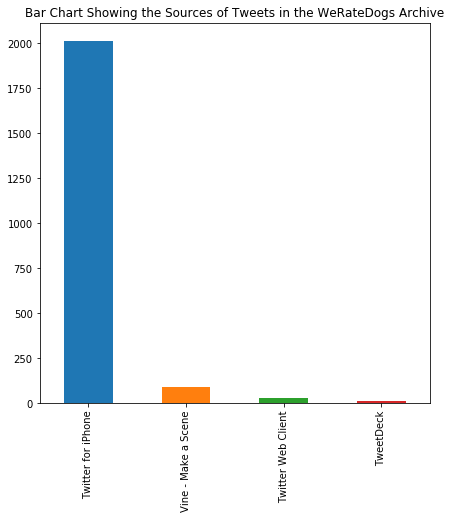

In [111]:
we_rate_dogs.source.value_counts().plot(kind='bar', title='Bar Chart Showing the Sources of Tweets in the WeRateDogs Archive', figsize=(7, 7))